In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura y limpieza de datos

In [7]:
data = {"spam": {},
        "ham": {}}
FILENAME = 'entrenamiento_1.txt'
ALPHA = 1 
TRAINING = 0.8
TESTING = 1 - TRAINING

def sanitize(string : str):
    """Sanitizez a string, removes symbols and converts to uppercase

    Args:
        string (str): word to be sanitized

    Returns:
        str: sanitized word
    """
    return string.strip('!.,;?:()-').upper()


def add_words(category : str, words : [str]):
    """grabs a list of words, sanitizes them and adds them to the data dictionary

    Args:
        category (str): either 'spam' or 'ham'
        words (str]): list of words to be added

     Returns:
        int: number of words added to the dictionary        
    """
    for word in words:
        word = sanitize(word)
        if word:
            if word in data[category]:
                data[category][word] += 1
            else:
                data[category][word] = 1

    return len(words)


def lecture():
    """reads the file and adds the words to the data dictionary
    """
    spam = 0
    ham = 0    
    spam_words = 0
    ham_words = 0

    with open(FILENAME, 'r') as f:
        lines_to_read = int(TRAINING * sum(1 for line in f))
        f.seek(0)

        for index, line in enumerate(f):
            line = line.split('\t')
            line[1] = line[1].rstrip('\n')
            line[1].replace('.', ' ')
            line[1] = line[1].split(' ', )        

            if line[0] == 'spam':
                spam += 1
                spam_words += add_words('spam', line[1])
            else:
                ham += 1
                ham_words += add_words('ham', line[1])

            if index >= lines_to_read:
                break

        
    return spam, ham, spam_words, ham_words

spam, ham, spam_words, ham_words = lecture()

print("Palabras distintas en spam: ", len(data['spam']))
print("Palabras distintas en ham: ", len(data['ham']))
print("mensajes spam: ", spam)
print("mensajes ham: ", ham)
print("palabras spam: ", spam_words)
print("palabras ham: ", ham_words)

Palabras distintas en spam:  2793
Palabras distintas en ham:  7031
mensajes spam:  603
mensajes ham:  3850
palabras spam:  14464
palabras ham:  54833


## Modelo Naive Bayes

In [8]:
def naive_bayes(message : [str]):
    """calculates the probability of a message being spam or ham; the words MUST be sanitized beforehand

    Args:
        message (str): message to be evaluated

    Returns:
        float: probability of being spam
        float: probability of being ham
    """

    p_spam = spam / (spam + ham)
    p_ham = ham / (spam + ham)

    p_spam_prob = [0] * (len(message))
    p_ham_prob = [0] * (len(message))   

    for index, word in enumerate(message):
        word_occurence_spam = data['spam'].get(word, 0) + ALPHA
        word_occurence_ham = data['ham'].get(word, 0) + ALPHA

        p_word_spam = word_occurence_spam / (spam_words + len(data['spam']) * ALPHA)
        p_word_ham = word_occurence_ham / (ham_words + len(data['ham']) * ALPHA)

        p_spam_prob[index] = p_word_spam 
        p_ham_prob[index] = p_word_ham

    p_spam_prob.append(p_spam)
    p_ham_prob.append(p_ham)

    probability_spam = np.prod(p_spam_prob)
    probability_ham =  np.prod(p_ham_prob)

    return probability_spam, probability_ham


## Testing

accuracy score:  0.9451438848920863


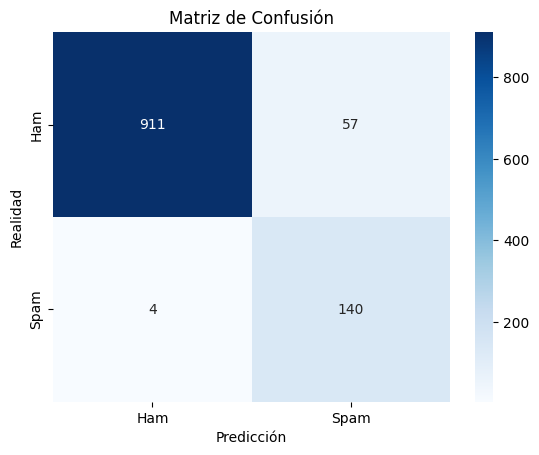

In [9]:
def sanitize_message(message : str):
    """takes the message and sanitizes it, removes symbols and converts to uppercase

    Args:
        message (str): message to be sanitized
    """
    message = message.rstrip('\n')
    message.replace('.', ' ')
    message = message.split(' ', )        

    for index, word in enumerate(message):
        word = word.upper()
        message[index] = sanitize(word)

    return message

def read():
    """reads the file and calculates the probability of each message being spam or ham

    Returns:
        [string]: returns two lists, one with the predicted values and the other with the actual values
    """
    with open(FILENAME, 'r') as f:
        lines = f.readlines()
    
    length = int(TESTING * len(lines))
    test_y = []
    actual_y = []

    for index, line in enumerate(reversed(lines)):
        if index >= length:
            break

        line = line.split('\t')
        message = sanitize_message(line[1])
        spam_p, ham_p = naive_bayes(message)

        actual_y.append(line[0])
        if spam_p > ham_p:
            test_y.append('spam')
        else:
            test_y.append('ham')
        

    return test_y, actual_y

test_y, actual_y = read()

cm = confusion_matrix(actual_y,test_y)
score = accuracy_score(actual_y,test_y)
print("accuracy score: ", score)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()
        

## Clasificación de mensajes futuros

In [11]:
menu_str = """
Bienvenido al clasificador de spam
1. Ingresar mensaje
2. Salir
"""

def classify_message():
    """Evaluates a message and prints the result
    """
    message = input("Ingrese el mensaje a clasificar: ")
    message = sanitize_message(message)
    spam_p, ham_p = naive_bayes(message)

    print("Probabilidad de ser spam: ", spam_p)
    print("Probabilidad de ser ham: ", ham_p)
    print("Respuesta del modelo: ")

    if spam_p > ham_p:
        print("\tEl mensaje es spam")
    else:
        print("\tEl mensaje no es spam")


def run():
    """ Runs the program for the user to interact with
    """
    is_running = True

    while is_running:
        print(menu_str)
        option = input("Ingrese una opción: ")

        if option == '1':
            classify_message()
        elif option == '2':
            is_running = False

run()
        


Bienvenido al clasificador de spam
1. Ingresar mensaje
2. Salir



Ingrese una opción:  2


## Task 2.4 - Comparación con Librerías

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Métricas de Desempeño en Training:
Accuracy Score: 0.993486073674753


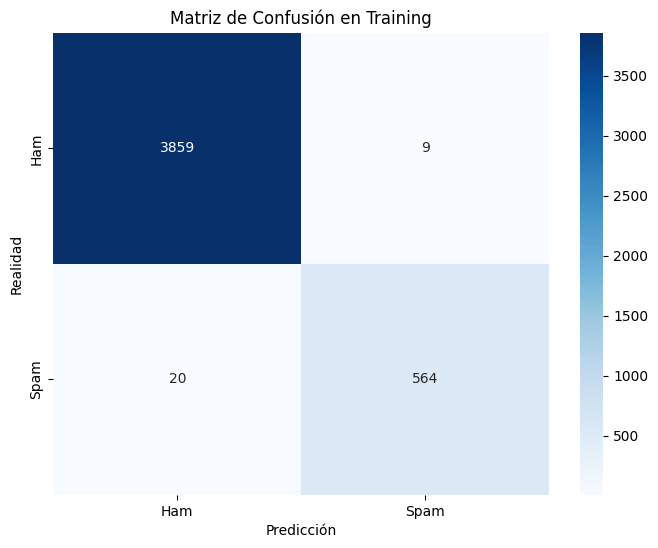


Métricas de Desempeño en Testing:
Accuracy Score: 0.9865229110512129


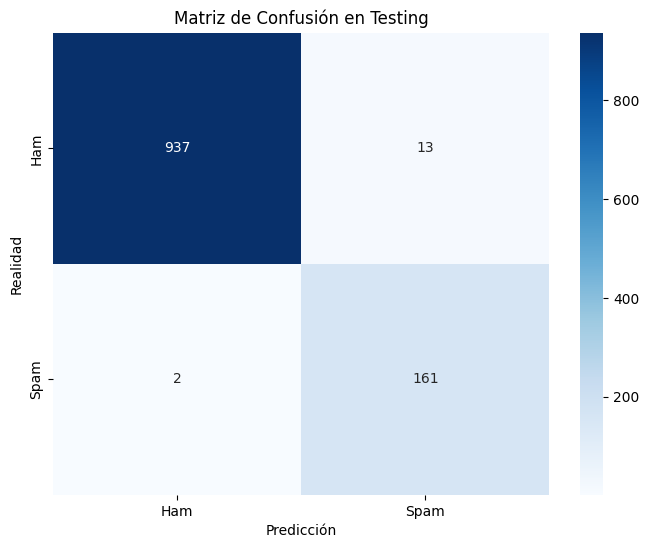


Comparación:
La implementación de sklearn tiene un accuracy score de 0.9865229110512129
La implementación propia tiene un accuracy score de 0.9451438848920863


In [13]:
def sanitize_message(message):
    message = message.rstrip('\n')
    message.replace('.', ' ')
    message = message.split(' ', )        

    for index, word in enumerate(message):
        word = word.upper()
        message[index] = sanitize(word)

    return message

with open("entrenamiento_1.txt", 'r') as f:
    lines = f.readlines()

X = [line.split('\t')[1] for line in lines]
y = [line.split('\t')[0] for line in lines]

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

model_sklearn = MultinomialNB()
model_sklearn.fit(X_train, y_train)

y_train_pred = model_sklearn.predict(X_train)
y_test_pred = model_sklearn.predict(X_test)

# Métricas de desempeño en training
cm_train = confusion_matrix(y_train, y_train_pred)
score_train = accuracy_score(y_train, y_train_pred)
print("Métricas de Desempeño en Training:")
print("Accuracy Score:", score_train)

# Visualización de la matriz de confusión en training
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión en Training')
plt.show()

# Métricas de desempeño en testing
cm_test = confusion_matrix(y_test, y_test_pred)
score_test = accuracy_score(y_test, y_test_pred)
print("\nMétricas de Desempeño en Testing:")
print("Accuracy Score:", score_test)

# Visualización de la matriz de confusión en testing
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión en Testing')
plt.show()

# Comparación con la implementación propia
print("\nComparación:")
print("La implementación de sklearn tiene un accuracy score de", score_test)
print("La implementación propia tiene un accuracy score de", score)

#### Comentarios

- ##### ¿Cuál implementación lo hizo mejor?
    La implementación de sklearn.naive_bayes.MultinomialNB fue mejor en términos de accuracy score.

- ##### ¿Por qué cree que se debe esta diferencia?
    sklearn.naive_bayes.MultinomialNB puede haber ajustado automáticamente algunos hiperparámetros durante el proceso de entrenamiento, mientras que en la implementación propia los hiperparámetros pueden no haber sido óptimos.